# Proyecto K-vecinos más Cercanos

In [21]:
# Importaciones necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

## 1. Cargado y procesamiento de datos 

In [22]:
# Cargar el dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv"
df = pd.read_csv(url, delimiter=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Análisis de los datos

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [24]:
# convertir la variable objetivo con un mapeo
# Definir el diccionario de mapeo
mapeo = {
    3: 0,
    4: 0,
    5: 1,
    6: 1,
    7: 2,
    8: 2
}

# Aplicar el mapeo a la columna 'quality'
df['quality'] = df['quality'].map(mapeo)

# Verificar los cambios
print(df['quality'].value_counts())

quality
1    1319
2     217
0      63
Name: count, dtype: int64


### Dividir en conjunto de entrenamiento y prueba

In [25]:
X = df.drop(['quality'],axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Normalización de los datos

In [26]:
# Normalizar características
escalador = MinMaxScaler()
X_train_scaled = escalador.fit_transform(X_train)  # Ajustar y transformar el conjunto de entrenamiento
X_test_scaled = escalador.transform(X_test)  # Transformar el conjunto de prueba

## 2. Entrenamiento del modelo KNN

In [27]:
# Entrenar el modelo
modelo_knn = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
modelo_knn.fit(X_train_scaled, y_train)
y_knn=modelo_knn.predict(X_test_scaled)

## 3. Evalúación del rendimiento 

In [28]:
# Reporte de metricas clasificacion report
print(f'Reporte para los datos normalizados:\n{classification_report(y_test, y_knn)}')

Reporte para los datos normalizados:
              precision    recall  f1-score   support

           0       0.50      0.18      0.27        11
           1       0.89      0.95      0.92       262
           2       0.68      0.53      0.60        47

    accuracy                           0.86       320
   macro avg       0.69      0.55      0.59       320
weighted avg       0.85      0.86      0.85       320



**Observaciones por clase:**
- clase 1: Tiene muchas mas muestras (262/320) segun el f1 en 92% se predice muy bien  
- clase 2: Tiene pocas muestras (47/320) segun el f1 en 60% su prediccion es algo baja  
- clase 0: No tiene sufientes muestras (11/320) segun el f1 en 27% no es nada fiable su predicción  

La exactitud es alta 86%, pero se debe sobre todo a la clase 1. Una propuesta posible para este dataset es aplicar una tecnica como SMOTE para comprobar si podemos tener un mejor rendimiento.


### Matriz de confusión

Matriz de Confusión:
 [[  2   9   0]
 [  1 249  12]
 [  1  21  25]]


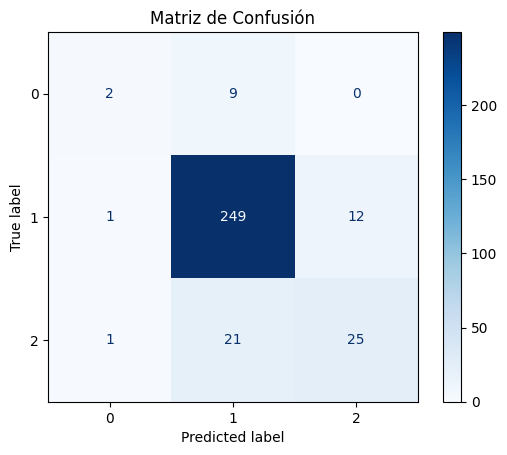

In [29]:
# 1. Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_knn)

# 2. Mostrarla en consola (opcional)
print("Matriz de Confusión:\n", cm)

# 3. Visualizar con gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1, 2])  # o labels de tus clases
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

### Modelo aplicando SMOTE

In [30]:
# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [31]:
# Entrenar el modelo con los datos balanceados
modelo_knn2 = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
modelo_knn2.fit(X_train_res, y_train_res)



KNeighborsClassifier(algorithm='brute', n_neighbors=3)

In [32]:
# Predecir sobre datos reales de prueba 
y_pred2 = modelo_knn2.predict(X_test_scaled)

In [33]:
# Reporte de métricas
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.12      0.45      0.20        11
           1       0.93      0.73      0.82       262
           2       0.51      0.81      0.63        47

    accuracy                           0.73       320
   macro avg       0.52      0.66      0.55       320
weighted avg       0.84      0.73      0.77       320



**Observaciones:**  
En general las metricas bajaron, incluso el f1 de la clase 1 paso de 91% a 82%, y obteniendo en este caso una exactitud general de 73% contra un 86% obtenido en el modelo sin SMOTE, posiblemente K Vecinos no es el mejor modelo para predecir la calidad del vino teniendo en cuenta el desvalance del dataset.

## 4. Optimización de k

In [34]:
# Lista de valores de k a probar
k_valores = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13 ]

# Listas para almacenar los resultados
precisiones = []

# Ciclo para probar cada valor de k
for k in k_valores:
    # Crear y entrenar el modelo
    modelo = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    modelo.fit(X_train_scaled, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = modelo.predict(X_test_scaled)
    
    # Calcular la precisión
    precision = accuracy_score(y_test, y_pred)
    precisiones.append(precision)
      
    # Calcular F1-score medio con validación cruzada
    f1_punt = cross_val_score(modelo, X_train_scaled, y_train, cv=5, scoring='f1_weighted')
    
    # Imprimir resultado para este k
    print(f'k={k}, Precisión: {precision:.4f} F1-score: {f1_punt.mean():.4f}')

# Encontrar el mejor valor de k
mejor_k = k_valores[precisiones.index(max(precisiones))]
print(f'\nMejor valor de k: {mejor_k} con precisión: {max(precisiones):.4f}')

k=1, Precisión: 0.8344 F1-score: 0.8156
k=2, Precisión: 0.8281 F1-score: 0.7999
k=3, Precisión: 0.8625 F1-score: 0.8108
k=4, Precisión: 0.8438 F1-score: 0.8109
k=5, Precisión: 0.8375 F1-score: 0.8069
k=6, Precisión: 0.8562 F1-score: 0.7963
k=7, Precisión: 0.8469 F1-score: 0.7958
k=8, Precisión: 0.8500 F1-score: 0.7952
k=9, Precisión: 0.8500 F1-score: 0.7898
k=10, Precisión: 0.8500 F1-score: 0.7890
k=11, Precisión: 0.8500 F1-score: 0.7928
k=12, Precisión: 0.8438 F1-score: 0.7925
k=13, Precisión: 0.8438 F1-score: 0.7906

Mejor valor de k: 3 con precisión: 0.8625


### Graficar los k vs la precision

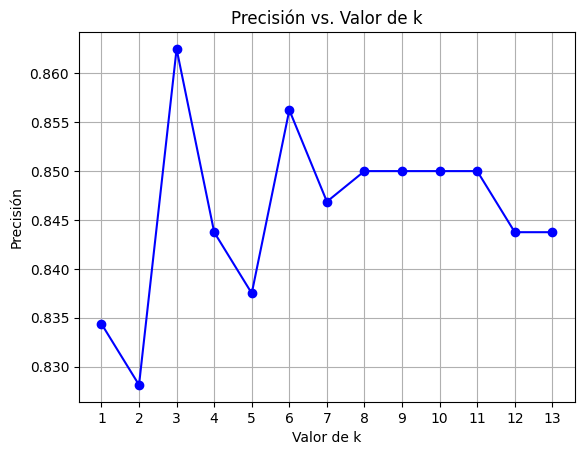

In [35]:
# Crear el gráfico
plt.plot(k_valores, precisiones, marker='o', linestyle='-', color='b')
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.title('Precisión vs. Valor de k')
plt.grid(True)
plt.xticks(k_valores) # Establecer los ticks del eje x exactamente en los valores de k
plt.show()

**Observación:**  
Se valida graficamente que el mejor valor de k es 3, que es el mismo numero de clases que tenemos

## 5. función que reciba valores numéricos y prediga la calidad

In [36]:
# Definir la función para predecir la calidad del vino
def wine_quality(features):
    """
    Predice la calidad del vino a partir de una lista de características numéricas.
    
    features es una lista con 11 valores numéricos correspondientes a:
    [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, 
    total sulfur dioxide, density, pH, sulphates, alcohol]
    
    """
    # Validar que la entrada tenga 11 características
    if len(features) != 11:
        return "Error: La entrada debe contener exactamente 11 valores numéricos."
    
    # Crear un DataFrame con los nombres de las columnas del dataset original
    feature_names = X_train.columns  # Obtener los nombres de las columnas de X_train
    features_df = pd.DataFrame([features], columns=feature_names)
    
    # Escalar los datos usando el escalador del entrenamiento
    features_scaled = escalador.transform(features_df)
    
    # Hacer la predicción
    prediccion = modelo_knn.predict(features_scaled)[0]
    
    # Mapear la predicción a una descripción
    calidad_map = {
        0: "baja 😣)",
        1: "media 😄",
        2: "alta 😎"
    }
    calidad = calidad_map[prediccion]
    
    return f"Este vino probablemente sea de calidad {calidad} 🍷"

In [37]:
# Llamar a la función 
entrada = [7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]
print(wine_quality(entrada))

Este vino probablemente sea de calidad media 😄 🍷
